In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualization_utils
import math
import seaborn as sns
import numpy as np

import visualization_utils

from baseline_constants import (
    ACCURACY_KEY,
    BYTES_READ_KEY,
    BYTES_WRITTEN_KEY,
    CLIENT_ID_KEY,
    LOCAL_COMPUTATIONS_KEY,
    NUM_ROUND_KEY,
    NUM_SAMPLES_KEY)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [22]:
def get_accuracy_vs_round_number(stat_metrics, weighted=True):
    if weighted:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY).apply(_weighted_mean, ACCURACY_KEY, NUM_SAMPLES_KEY)
        accuracies = accuracies.reset_index(name=ACCURACY_KEY)

    else:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
        stds = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).std()

    percentile_10 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.10)) #.quantile(10),
    percentile_90 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.90)) #.quantile(90),

    return accuracies, percentile_10, percentile_90

def _weighted_mean(df, metric_name, weight_name):
    d = df[metric_name]
    w = df[weight_name]

    try:
        return (w * d).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

def plot_accuracy_vs_round_number(realx_axis_values, 
                                  realy_axis_values,
                                  realx_axis_values_50, 
                                  realy_axis_values_50,
                                  leafx_axis_values, 
                                  leafy_axis_values, 
                                  leafx_axis_values_2, 
                                  leafy_axis_values_2, 
                                  leafx_axis_values_3, 
                                  leafy_axis_values_3, 
                                  atype, 
                                  weighted=False, figsize=(8, 6), title_fontsize=16, **kwargs):

    fig = plt.figure(figsize=figsize)
    title_weighted = 'Weighted' if weighted else 'Unweighted'
    plt.title(atype + ' Accuracy vs Round Number (%s)' % title_weighted, fontsize=title_fontsize)
#     plt.suptitle("Seed: 1549774894, Clients: 2, Epochs:10, Batch:20", y=1, fontsize=15)
    
    plt.plot(realx_axis_values, realy_axis_values, label='FedAvg (0% Droprate)')
    plt.plot(realx_axis_values_50, realy_axis_values_50, label='FedAvg (50% Droprate)')
    plt.plot(leafx_axis_values, leafy_axis_values, label='Hasaas (30% Pruned)')
    plt.plot(leafx_axis_values_2, leafy_axis_values_2, label='Hasaas (50% Pruned)')
    plt.plot(leafx_axis_values_3, leafy_axis_values_3, label='Hasaas (70% Pruned)')
    
    max_y1 = np.amax(realy_axis_values)
    max_y2 = np.amax(leafy_axis_values)
    
    ylimit = min(max(max_y1, max_y2) + 0.1, 1)
    
    plt.legend(loc='best', fontsize=25)

    plt.ylabel('Accuracy', fontsize=25)
    plt.xlabel('Round Number', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#     plt.ylim(0,0.8)
    
#     print(fig.axes)
    
    plt.savefig('fig.png')
    
def plot_accuracy_vs_round_number_small(realx_axis_values, 
                                  realy_axis_values,
                                  realx_axis_values_50, 
                                  realy_axis_values_50,
                                  leafx_axis_values, 
                                  leafy_axis_values, 
                                  leafx_axis_values_2, 
                                  leafy_axis_values_2, 
                                  leafx_axis_values_3, 
                                  leafy_axis_values_3, 
                                  atype, 
                                  weighted=False, figsize=(8, 6), title_fontsize=16, **kwargs):

    fig = plt.figure(figsize=figsize)
    title_weighted = 'Weighted' if weighted else 'Unweighted'
    plt.title(atype + ' Accuracy vs Round Number (%s)' % title_weighted, fontsize=title_fontsize)
#     plt.suptitle("Seed: 1549774894, Clients: 2, Epochs:10, Batch:20", y=1, fontsize=15)
    
    plt.plot(realx_axis_values, realy_axis_values, label='FedAvg (0% Droprate)')
#     plt.plot(realx_axis_values_50, realy_axis_values_50, label='FedAvg (50% Droprate)')
    plt.plot(leafx_axis_values, leafy_axis_values, label='Hasaas (30% Pruned)')
    plt.plot(leafx_axis_values_2, leafy_axis_values_2, label='Hasaas (50% Pruned)')
    plt.plot(leafx_axis_values_3, leafy_axis_values_3, label='Hasaas (70% Pruned)')
    
    max_y1 = np.amax(realy_axis_values)
    max_y2 = np.amax(leafy_axis_values)
    
    ylimit = min(max(max_y1, max_y2) + 0.1, 1)
    
    plt.legend(loc='best', fontsize=25)

    plt.ylabel('Accuracy', fontsize=25)
    plt.xlabel('Round Number', fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#     plt.ylim(0,0.8)
    
#     print(fig.axes)
    
    plt.savefig('fig.png')
    
def plot_accuracy_vs_round_number_all(accuracy_fedavg_x,
                   accuracy_fedavg_y,
                   accuracy_fedavg_50_x,
                   accuracy_fedavg_50_y,
                              
                   accuracy_fedavg_30_x,
                   accuracy_fedavg_30_y,
                   accuracy_fedavg_50_all_x,
                   accuracy_fedavg_50_all_y,
                   accuracy_fedavg_70_x,
                   accuracy_fedavg_70_y,
                              
                   accuracy_hasaas_30_x,
                   accuracy_hasaas_30_y,
                   accuracy_hasaas_50_x,
                   accuracy_hasaas_50_y,
                   accuracy_hasaas_70_x,
                   accuracy_hasaas_70_y,
                                  atype, 
                                  weighted=False, figsize=(10, 8), title_fontsize=16, **kwargs):

    fig = plt.figure(figsize=figsize)
    title_weighted = 'Weighted' if weighted else 'Unweighted'
    plt.title(atype + ' Accuracy vs Round Number (%s)' % title_weighted, fontsize=title_fontsize)
#     plt.suptitle("Seed: 1549774894, Clients: 2, Epochs:10, Batch:20", y=1, fontsize=15)
    
    plt.plot(accuracy_fedavg_x, accuracy_fedavg_y, label='FedAvg (0% Droprate)')
    plt.plot(accuracy_fedavg_50_x, accuracy_fedavg_50_y, label='FedAvg (50% Droprate)')
    plt.plot(accuracy_fedavg_30_x, accuracy_fedavg_30_y, label='FedAvg (30% Pruned to All)')
    plt.plot(accuracy_fedavg_50_all_x, accuracy_fedavg_50_all_y, label='FedAvg (50% Pruned to All)')
    plt.plot(accuracy_fedavg_70_x, accuracy_fedavg_70_y, label='FedAvg (70% Pruned to All)')

    plt.plot(accuracy_hasaas_30_x, accuracy_hasaas_30_y, label='Hasaas (30% Pruned)')
    plt.plot(accuracy_hasaas_50_x, accuracy_hasaas_50_y, label='Hasaas (50% Pruned)')
    plt.plot(accuracy_hasaas_70_x, accuracy_hasaas_70_y, label='Hasaas (70% Pruned)')
    
#     max_y1 = np.amax(realy_axis_values)
#     max_y2 = np.amax(leafy_axis_values)
    
#     ylimit = min(max(max_y1, max_y2) + 0.1, 1)
    
    plt.legend(fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Round Number', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#     plt.ylim(0,0.8)
    
#     print(fig.axes)
    plt.tight_layout()
    plt.savefig('fig.png')

accuracy_fedavg_30.iloc[-1]['accuracy'] * 100 72.0


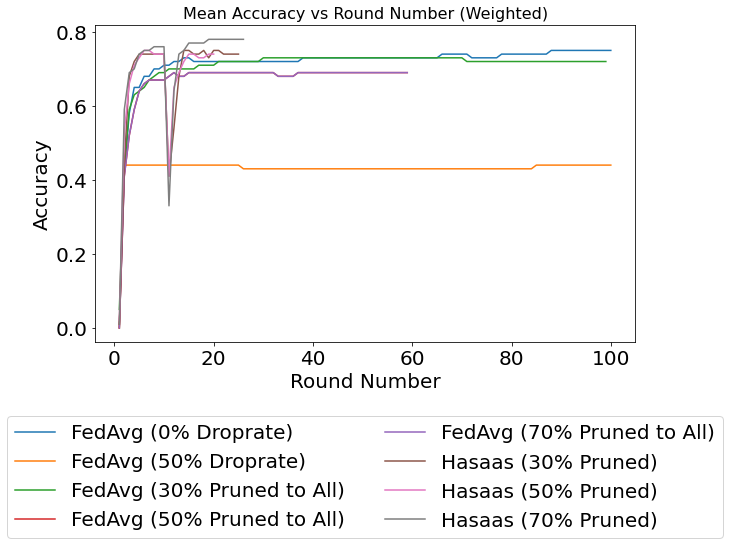

In [25]:
accuracies = []

fpath = f"system_heterogeneity/fedavg_hasaas/"
fedavg_stats = fpath + '0/metrics_stat_testbed.csv'
fedavg_50_stats = fpath + '0_50/metrics_stat_testbed.csv'
hasaas_30_stats = fpath + '30/metrics_stat_testbed.csv'
hasaas_50_stats = fpath + '50/metrics_stat_testbed.csv'
hasaas_70_stats = fpath + '70/metrics_stat_testbed.csv'



file_fedavg = visualization_utils.load_data(fedavg_stats)
file_fedavg_50 = visualization_utils.load_data(fedavg_50_stats)
file_hasaas_30 = visualization_utils.load_data(hasaas_30_stats)
file_hasaas_50 = visualization_utils.load_data(hasaas_50_stats)
file_hasaas_70 = visualization_utils.load_data(hasaas_70_stats)



accuracy_fedavg,_, _ = get_accuracy_vs_round_number(file_fedavg, True)
accuracy_fedavg_50,_, _ = get_accuracy_vs_round_number(file_fedavg_50, True)
accuracy_hasaas_30,_, _ = get_accuracy_vs_round_number(file_hasaas_30, True)
accuracy_hasaas_50,_, _ = get_accuracy_vs_round_number(file_hasaas_50, True)
accuracy_hasaas_70,_, _ = get_accuracy_vs_round_number(file_hasaas_70, True)

fpath = f"system_heterogeneity/fedavg_small/"
fedavg_30_stats = fpath + '30/metrics_stat_testbed.csv'
fedavg_50_all_stats = fpath + '50/metrics_stat_testbed.csv'
fedavg_70_stats = fpath + '70/metrics_stat_testbed.csv'

file_fedavg_30 = visualization_utils.load_data(fedavg_30_stats)
file_fedavg_50_all = visualization_utils.load_data(fedavg_50_all_stats)
file_fedavg_70 = visualization_utils.load_data(fedavg_70_stats)



accuracy_fedavg_30,_, _ = get_accuracy_vs_round_number(file_fedavg_30, True)
accuracy_fedavg_50_all,_, _ = get_accuracy_vs_round_number(file_fedavg_50_all, True)
accuracy_fedavg_70,_, _ = get_accuracy_vs_round_number(file_fedavg_70, True)
# print("----------------- FedAvg accuracy")
# print(accuracy_fedavg)

# print("----------------- Hasaas 30% accuracy")
# print(accuracy_hasaas_30[:50])

# print(accuracy_hasaas_70.iloc[-1]['accuracy'])

# print("----------------- Hasaas 50% accuracy")
# print(accuracy_hasaas_50)
print("accuracy_fedavg_30.iloc[-1]['accuracy'] * 100", accuracy_fedavg_30.iloc[-1]['accuracy'] * 100)

plot_accuracy_vs_round_number_all(accuracy_fedavg[NUM_ROUND_KEY],
                   accuracy_fedavg[ACCURACY_KEY],
                   accuracy_fedavg_50[NUM_ROUND_KEY],
                   accuracy_fedavg_50[ACCURACY_KEY],
                              
                   accuracy_fedavg_30[NUM_ROUND_KEY],
                   accuracy_fedavg_30[ACCURACY_KEY],
                   accuracy_fedavg_50_all[NUM_ROUND_KEY],
                   accuracy_fedavg_50_all[ACCURACY_KEY],
                   accuracy_fedavg_70[NUM_ROUND_KEY],
                   accuracy_fedavg_70[ACCURACY_KEY],
                              
                   accuracy_hasaas_30[NUM_ROUND_KEY],
                   accuracy_hasaas_30[ACCURACY_KEY],
                   accuracy_hasaas_50[NUM_ROUND_KEY],
                   accuracy_hasaas_50[ACCURACY_KEY],
                   accuracy_hasaas_70[NUM_ROUND_KEY],
                   accuracy_hasaas_70[ACCURACY_KEY],
                   'Mean', True)

In [24]:
# fedavg_rows_until_20= file_fedavg.loc[(file_fedavg['is_slow'] == 1) & (file_fedavg['round_number'] <= 20)]
# fedavg_50_rows_until_20= file_fedavg_50.loc[(file_fedavg_50['is_slow'] == 1) & (file_fedavg_50['round_number'] <= 20)]

# fedavg_rows_until_20= file_fedavg.loc[(file_fedavg['is_slow'] == 1) & (file_fedavg['round_number'] <= 20)]
# fedavg_50_rows_until_20= file_fedavg_50.loc[(file_fedavg_50['is_slow'] == 1) & (file_fedavg_50['round_number'] <= 20)]

# hasaas_30_rows_until_20= file_hasaas_30.loc[(file_hasaas_30['is_slow'] == 1) & (file_hasaas_30['round_number'] <= 20)]
# hasaas_50_rows_until_20= file_hasaas_50.loc[(file_hasaas_50['is_slow'] == 1) & (file_hasaas_50['round_number'] <= 20)]
# hasaas_70_rows_until_20= file_hasaas_70.loc[(file_hasaas_70['is_slow'] == 1) & (file_hasaas_70['round_number'] <= 20)]


fedavg_rows_until_20= file_fedavg.loc[(file_fedavg['is_slow'] == 1) & (file_fedavg['round_number'] <= 20)]
fedavg_50_rows_until_20= file_fedavg_50.loc[(file_fedavg_50['is_slow'] == 1) & (file_fedavg_50['round_number'] <= 20)]

hasaas_30_rows_until_20= file_hasaas_30.loc[(file_hasaas_30['is_slow'] == 1) & (file_hasaas_30['round_number'] <= 20)]
hasaas_50_rows_until_20= file_hasaas_50.loc[(file_hasaas_50['is_slow'] == 1) & (file_hasaas_50['round_number'] <= 20)]
hasaas_70_rows_until_20= file_hasaas_70.loc[(file_hasaas_70['is_slow'] == 1) & (file_hasaas_70['round_number'] <= 20)]

fedavg_30_rows_until_20= file_fedavg_30.loc[(file_fedavg_30['is_slow'] == 1) & (file_fedavg_30['round_number'] <= 20)]
fedavg_50_all_rows_until_20= file_fedavg_50_all.loc[(file_fedavg_50_all['is_slow'] == 1) & (file_fedavg_50_all['round_number'] <= 20)]
fedavg_70_rows_until_20= file_fedavg_70.loc[(file_fedavg_70['is_slow'] == 1) & (file_fedavg_70['round_number'] <= 20)]

In [23]:
x_coordinates = [] # Test Accuracy
y_coordinates = [] # Training Time
markers = []
labels = []

convergence_time_fedavg = (np.sum(fedavg_rows_until_20['total_train_time']/1000 + fedavg_rows_until_20['model_download_time'] + fedavg_rows_until_20['model_report_time']) / 60) / 60

x_coordinates.append(accuracy_fedavg.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg)
markers.append("o")
labels.append("FedAvg (0% Droprate)")

convergence_time_fedavg_50 = (np.sum(fedavg_50_rows_until_20['total_train_time']/1000 + fedavg_50_rows_until_20['model_download_time'] + fedavg_50_rows_until_20['model_report_time']) / 60) / 60

x_coordinates.append(accuracy_fedavg_50.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_50)
markers.append("P")
labels.append("FedAvg (50% Droprate)")

convergence_time_hasaas_30 = (np.sum(hasaas_30_rows_until_20['total_train_time']/1000 + hasaas_30_rows_until_20['model_download_time'] + hasaas_30_rows_until_20['model_report_time']) / 60) / 60

x_coordinates.append(accuracy_hasaas_30.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_30)
markers.append("^")
labels.append("Hasaas (30% Pruned)")


convergence_time_hasaas_50 = (np.sum(hasaas_50_rows_until_20['total_train_time']/1000 + hasaas_50_rows_until_20['model_download_time'] + hasaas_50_rows_until_20['model_report_time']) / 60) / 60

x_coordinates.append(accuracy_hasaas_50.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_50)
markers.append(">")
labels.append("Hasaas (50% Pruned)")

convergence_time_hasaas_70 = (np.sum(hasaas_70_rows_until_20['total_train_time']/1000 + hasaas_70_rows_until_20['model_download_time'] + hasaas_70_rows_until_20['model_report_time']) / 60) / 60

x_coordinates.append(accuracy_hasaas_70.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_70)
markers.append("X")
labels.append("Hasaas (70% Pruned)")



In [24]:
print(x_coordinates)

[72.0, 43.0, 74.0, 74.0, 78.0]


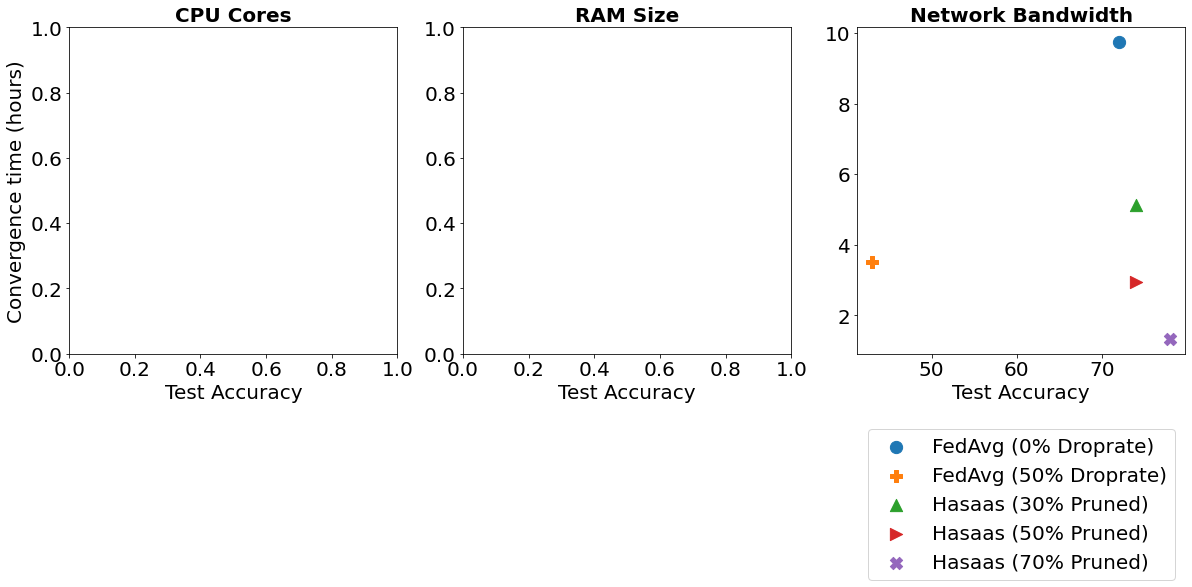

In [25]:
fig, axs = plt.subplots(1, 3,figsize=(20,6))
#'FedAvg (4 Cores & Large)', 'FedAvg (4 Cores & 30%)', 'FedAvg (4 Cores & 50%)', 'FedAvg (4 Cores & 70%)'


handles = []
for index, (xp, yp, m) in enumerate(zip(x_coordinates, y_coordinates, markers)):
#     print(xp)
#     print(yp)
    handle = plt.scatter(xp, yp, s=150, marker=m)
    axs[0].set_xlabel("Test Accuracy", fontsize=20)
    axs[0].set_ylabel("Convergence time (hours)", fontsize=20)
    axs[0].set_title("CPU Cores", fontsize=20, fontweight='bold',  fontname="Sans-Serif")
    axs[1].set_title("RAM Size", fontsize=20, fontweight='bold',  fontname="Sans-Serif")
    axs[2].set_title("Network Bandwidth", fontsize=20, fontweight='bold',  fontname="Sans-Serif")
    axs[1].set_xlabel("Test Accuracy", fontsize=20)
    axs[2].set_xlabel("Test Accuracy", fontsize=20)
    
    handles.append(handle)
plt.legend(handles = handles , labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=False, fontsize=20)

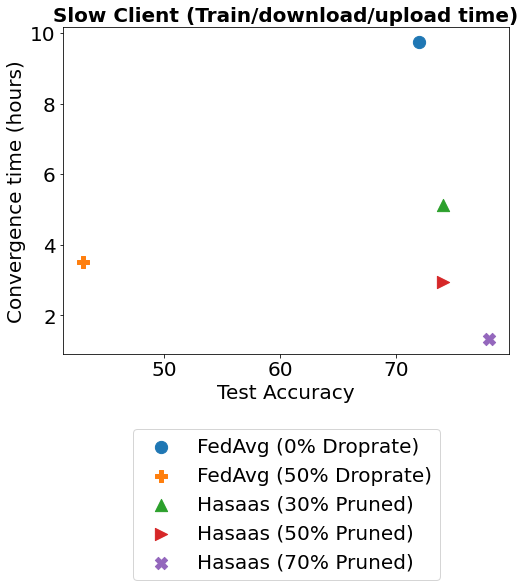

In [26]:
plt.figure(figsize=(8,6))
#'FedAvg (4 Cores & Large)', 'FedAvg (4 Cores & 30%)', 'FedAvg (4 Cores & 50%)', 'FedAvg (4 Cores & 70%)'


handles = []
for index, (xp, yp, m) in enumerate(zip(x_coordinates, y_coordinates, markers)):
    handle = plt.scatter(xp, yp, s=150, marker=m)
    handles.append(handle)
plt.xlabel("Test Accuracy", fontsize=20)
plt.ylabel("Convergence time (hours)", fontsize=20)
plt.title("Slow Client (Train/download/upload time)", fontsize=20, fontweight='bold')
    
plt.legend(handles = handles , labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=False, fontsize=20)

In [21]:
x_coordinates = [] # Test Accuracy
y_coordinates = [] # Training Time
markers = []
labels = []

convergence_time_fedavg = np.sum(((fedavg_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg)
markers.append("o")
labels.append("FedAvg (0% Droprate)")

convergence_time_fedavg_50 = np.sum(((fedavg_50_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_50.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_50)
markers.append("v")
labels.append("FedAvg (50% Droprate)")

convergence_time_fedavg_30 = np.sum(((fedavg_30_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_30.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_30)
markers.append("^")
labels.append("FedAvg (30% Pruned to All)")

convergence_time_fedavg_50_all = np.sum(((fedavg_50_all_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_50_all.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_50_all)
markers.append(">")
labels.append("FedAvg (50% Pruned to All)")

convergence_time_fedavg_70 = np.sum(((fedavg_70_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_70.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_70)
markers.append("P")
labels.append("FedAvg (70% Pruned to All)")

convergence_time_hasaas_30 = np.sum(((hasaas_30_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_30.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_30)
markers.append("+")
labels.append("Hasaas (30% Pruned)")


convergence_time_hasaas_50 = np.sum(((hasaas_50_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_50.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_50)
print()
markers.append("X")
labels.append("Hasaas (50% Pruned)")



convergence_time_hasaas_70 = np.sum(((hasaas_70_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_70.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_70)
markers.append("H")
labels.append("Hasaas (70% Pruned)")


print("convergence_time_fedavg", convergence_time_fedavg, "convergence_time_hasaas_30", convergence_time_hasaas_30, "convergence_time_hasaas_50, ", convergence_time_hasaas_50, " convergence_time_hasaas_70", convergence_time_hasaas_70)


convergence_time_fedavg 9.912222222222221 convergence_time_hasaas_30 5.320555555555556 convergence_time_hasaas_50,  3.1169444444444445  convergence_time_hasaas_70 3.111388888888889


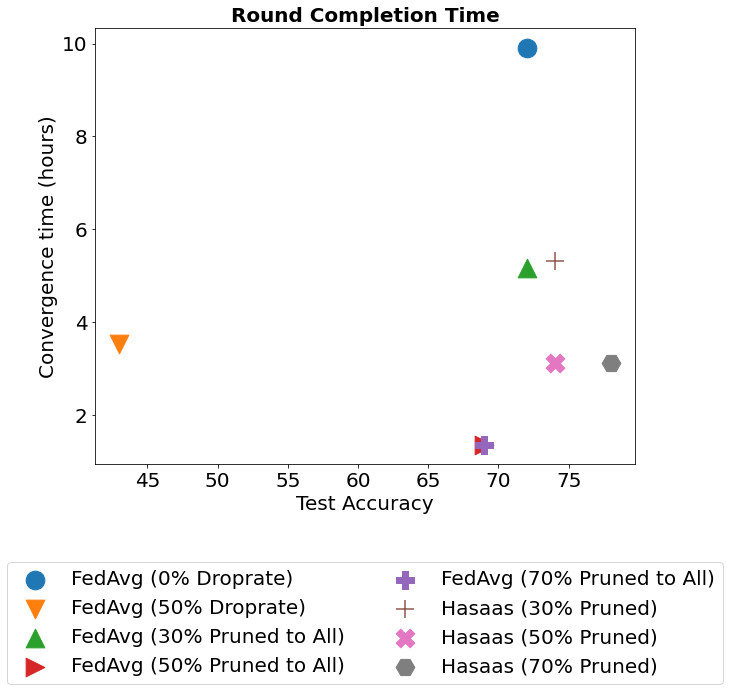

In [91]:
fig = plt.figure(figsize=(10,10))
#'FedAvg (4 Cores & Large)', 'FedAvg (4 Cores & 30%)', 'FedAvg (4 Cores & 50%)', 'FedAvg (4 Cores & 70%)'

fig.set_facecolor('white')
handles = []
for index, (xp, yp, m) in enumerate(zip(x_coordinates, y_coordinates, markers)):
    handle = plt.scatter(xp, yp, s=350, marker=m)
    handles.append(handle)
plt.xlabel("Test Accuracy", fontsize=20)
plt.ylabel("Convergence time (hours)", fontsize=20)
plt.title("Round Completion Time", fontsize=20, fontweight='bold')
    
plt.legend(handles = handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=False, fontsize=20, ncol=2)
plt.tight_layout()
plt.savefig("fedavg_hasaas_convergence_time.png", transparent=False)

0.69


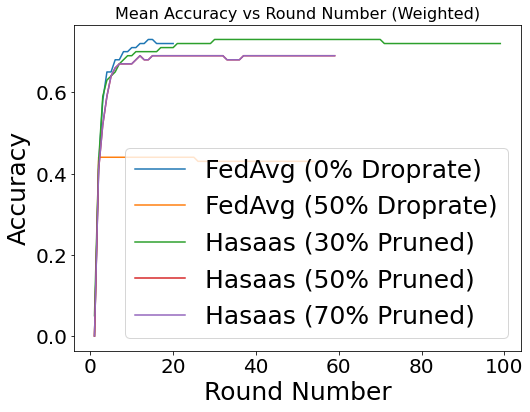

In [38]:
accuracies = []

fpath = f"system_heterogeneity/fedavg_small/"
fedavg_stats = fpath + '0/metrics_stat_testbed.csv'
hasaas_30_stats = fpath + '30/metrics_stat_testbed.csv'
hasaas_50_stats = fpath + '50/metrics_stat_testbed.csv'
hasaas_70_stats = fpath + '70/metrics_stat_testbed.csv'

file_fedavg = visualization_utils.load_data(fedavg_stats)
file_hasaas_30 = visualization_utils.load_data(hasaas_30_stats)
file_hasaas_50 = visualization_utils.load_data(hasaas_50_stats)
file_hasaas_70 = visualization_utils.load_data(hasaas_70_stats)



accuracy_fedavg,_, _ = get_accuracy_vs_round_number(file_fedavg, True)
accuracy_hasaas_30,_, _ = get_accuracy_vs_round_number(file_hasaas_30, True)
accuracy_hasaas_50,_, _ = get_accuracy_vs_round_number(file_hasaas_50, True)
accuracy_hasaas_70,_, _ = get_accuracy_vs_round_number(file_hasaas_70, True)

# print("----------------- FedAvg accuracy")
# print(accuracy_fedavg)

# print("----------------- Hasaas 30% accuracy")
# print(accuracy_hasaas_30[:50])

print(accuracy_hasaas_70.iloc[-1]['accuracy'])

# print("----------------- Hasaas 50% accuracy")
# print(accuracy_hasaas_50)


plot_accuracy_vs_round_number(accuracy_fedavg[NUM_ROUND_KEY],
                   accuracy_fedavg[ACCURACY_KEY],
                    accuracy_fedavg_50[NUM_ROUND_KEY],
                   accuracy_fedavg_50[ACCURACY_KEY],
                   accuracy_hasaas_30[NUM_ROUND_KEY],
                   accuracy_hasaas_30[ACCURACY_KEY],
                   accuracy_hasaas_50[NUM_ROUND_KEY],
                   accuracy_hasaas_50[ACCURACY_KEY],
                   accuracy_hasaas_70[NUM_ROUND_KEY],
                   accuracy_hasaas_70[ACCURACY_KEY],
                   'Mean', True)

In [39]:
fedavg_rows_until_20= file_fedavg.loc[(file_fedavg['is_slow'] == 1) & (file_fedavg['round_number'] <= 20)]
hasaas_30_rows_until_20= file_hasaas_30.loc[(file_hasaas_30['is_slow'] == 1) & (file_hasaas_30['round_number'] <= 20)]
hasaas_50_rows_until_20= file_hasaas_50.loc[(file_hasaas_50['is_slow'] == 1) & (file_hasaas_50['round_number'] <= 20)]
hasaas_70_rows_until_20= file_hasaas_70.loc[(file_hasaas_70['is_slow'] == 1) & (file_hasaas_70['round_number'] <= 20)]

In [40]:
x_coordinates = [] # Test Accuracy
y_coordinates = [] # Training Time
markers = []
labels = []

convergence_time_fedavg = np.sum(((fedavg_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg)
markers.append("o")
labels.append("FedAvg (0% Droprate)")


convergence_time_hasaas_30 = np.sum(((hasaas_30_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_30.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_30)
markers.append("^")
labels.append("30% Pruned")


convergence_time_hasaas_50 = np.sum(((hasaas_50_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_50.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_50)
print()
markers.append(">")
labels.append("50% Pruned")



convergence_time_hasaas_70 = np.sum(((hasaas_70_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_70.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_70)
markers.append("X")
labels.append("70% Pruned")


print("convergence_time_fedavg", convergence_time_fedavg, "convergence_time_hasaas_30", convergence_time_hasaas_30, "convergence_time_hasaas_50, ", convergence_time_hasaas_50, " convergence_time_hasaas_70", convergence_time_hasaas_70)


convergence_time_fedavg 9.912222222222221 convergence_time_hasaas_30 5.165555555555556 convergence_time_hasaas_50,  1.3619444444444444  convergence_time_hasaas_70 1.3619444444444444


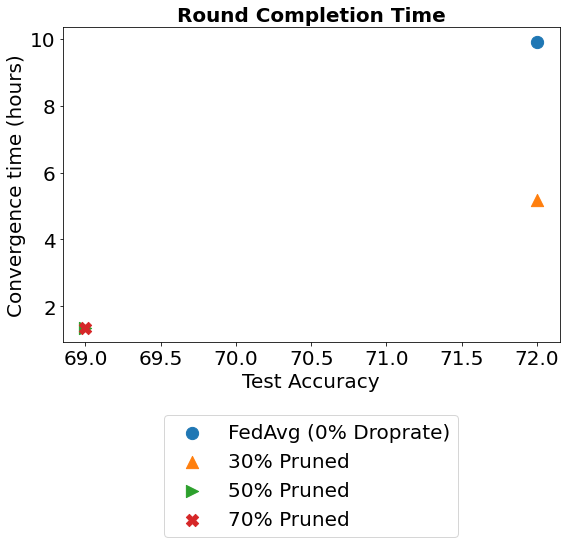

In [41]:
fig = plt.figure(figsize=(8,8))
#'FedAvg (4 Cores & Large)', 'FedAvg (4 Cores & 30%)', 'FedAvg (4 Cores & 50%)', 'FedAvg (4 Cores & 70%)'

fig.set_facecolor('white')
handles = []
for index, (xp, yp, m) in enumerate(zip(x_coordinates, y_coordinates, markers)):
    handle = plt.scatter(xp, yp, s=150, marker=m)
    handles.append(handle)
plt.xlabel("Test Accuracy", fontsize=20)
plt.ylabel("Convergence time (hours)", fontsize=20)
plt.title("Round Completion Time", fontsize=20, fontweight='bold')
    
plt.legend(handles = handles , labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=False, fontsize=20)
plt.tight_layout()
plt.savefig("fedavg_hasaas_convergence_time.png", transparent=False)